In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import csv
from scipy import optimize
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


from numpy import linalg as LA
import scipy.sparse as sparse
from scipy.sparse import csc_matrix
from scipy.sparse import dia_matrix
import itertools
from itertools import combinations
import operator
from mpl_toolkits import mplot3d

from utils import *
import math

In [2]:
def lorenz(t, pop):
    # alpha, beta, pho = 10, 8/3, 28
    alpha, beta, pho = 10, 2, 25
    x, y, z = pop
    return np.array([alpha*(y-x),
            x*(pho-z) - y,
            x*y - beta*z])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


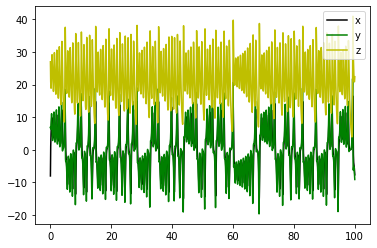

In [3]:
##plot data over time
tspan = np.linspace(0.001, 100, num=100000)
dt = 0.001
ini = [-8, 7, 27]
sol = integrate.solve_ivp(lorenz, [tspan[0], tspan[-1]], ini, method='RK45', t_eval=tspan)

# fig = plt.figure(figsize=(10,8))
plt.plot(sol.t, sol.y[0].T, 'k',label='x')
plt.plot(sol.t, sol.y[1].T, 'g',label='y')
plt.plot(sol.t, sol.y[2].T, 'y',label='z')
plt.legend()
plt.show()

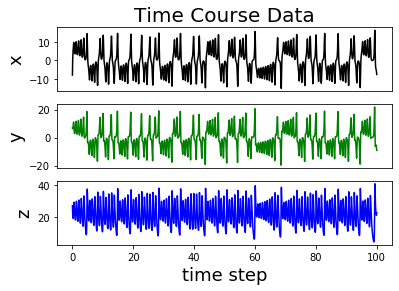

In [4]:
#plot data over time 2
y1 = sol.y[0].T
y2 = sol.y[1].T
y3 = sol.y[2].T

x = sol.t

fig = plt.figure()
plt.subplot(3,1,1)
plt.plot(x,y1,'k')
plt.title('Time Course Data',fontsize=20)
plt.ylabel('x',fontsize=18)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.subplot(3,1,2)
plt.plot(x,y2,'g')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('y',fontsize=18)


plt.subplot(3,1,3)
plt.plot(x,y3,'b')
plt.ylabel('z',fontsize=18)
plt.xlabel('time step',fontsize=18)
plt.show()

# plt.savefig('lorenz_timecourse.png')

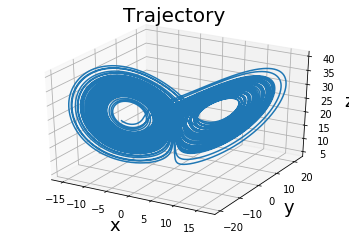

In [5]:
#plot trajectory
fig = plt.figure()
ax = plt.axes(projection = '3d')
xdata = sol.y[0]
ydata = sol.y[1]
zdata = sol.y[2]
# ax.scatter3D(xdata,ydata,zdata, c=zdata)
ax.plot3D(xdata,ydata,zdata)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.set_zlabel('z',fontsize=18)
ax.set_title('Trajectory',fontsize=20)
plt.show()

In [6]:
## print vector of Lambda, Euclidean distance vector, and num of terms
dx = lorenz(sol.t, sol.y)
theta, descr = lib_terms(sol.y,3,'xyz')
## theta and descr
Xi = sparsifyDynamics(theta, dx.T, 0.05)
print(Xi)
# obtain Xi here by changing lambda
L,E,N = evaluate(theta,-5,1,10,dx.T)
#lambda vector, euclidean distance vector, and num of terms
print(L)
print(E)
print(N)

[[  0.   0.   0.]
 [  0.   0.  -2.]
 [ 10.  -1.   0.]
 [-10.  25.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.  -1.   0.]
 [  0.   0.   1.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]]
[1.00000000e-05 4.64158883e-05 2.15443469e-04 1.00000000e-03
 4.64158883e-03 2.15443469e-02 1.00000000e-01 4.64158883e-01
 2.15443469e+00 1.00000000e+01]
[2.08195328e-08 2.08195328e-08 2.08195328e-08 2.08195328e-08
 2.08195328e-08 2.08195328e-08 2.08195328e-08 2.08195328e-08
 7.55226545e+04 7.55226545e+04]
[7 7 7 7 7 7 7 7 3 3]


In [7]:
## print library: Theta; and corresponding descriptions
print(theta)
print(descr)

[[ 1.00000000e+00  2.70000000e+01  7.00000000e+00 ...  1.72800000e+03
   4.48000000e+02 -5.12000000e+02]
 [ 1.00000000e+00  2.68906051e+01  7.00841680e+00 ...  1.65736481e+03
   4.31953959e+02 -4.83867336e+02]
 [ 1.00000000e+00  2.67824174e+01  7.01569640e+00 ...  1.58909501e+03
   4.16265939e+02 -4.57035710e+02]
 ...
 [ 1.00000000e+00  2.23675847e+01 -9.07309584e+00 ...  1.29912832e+03
  -5.26973114e+02 -4.42638759e+02]
 [ 1.00000000e+00  2.23920795e+01 -9.08400611e+00 ...  1.30550523e+03
  -5.29616620e+02 -4.45170402e+02]
 [ 1.00000000e+00  2.24167394e+01 -9.09475487e+00 ...  1.31189964e+03
  -5.32254289e+02 -4.47705322e+02]]
['1', '(0, 0, 1) xyz', '(0, 1, 0) xyz', '(1, 0, 0) xyz', '(0, 0, 2) xyz', '(0, 1, 1) xyz', '(0, 2, 0) xyz', '(1, 0, 1) xyz', '(1, 1, 0) xyz', '(2, 0, 0) xyz', '(0, 0, 3) xyz', '(0, 1, 2) xyz', '(0, 2, 1) xyz', '(0, 3, 0) xyz', '(1, 0, 2) xyz', '(1, 1, 1) xyz', '(1, 2, 0) xyz', '(2, 0, 1) xyz', '(2, 1, 0) xyz', '(3, 0, 0) xyz']


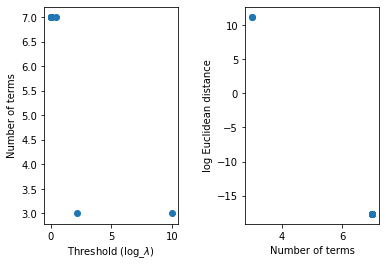

In [8]:
plt.subplot(1,2,1)
# plt.scatter(lambda_vec, num_terms)
plt.scatter(L, N)
plt.xlabel("Threshold (log_$\lambda$)")
plt.ylabel("Number of terms")
plt.subplot(1,2,2)
# plt.scatter(num_terms, eudist_vec)
plt.scatter(N, np.log(E))
plt.xlabel("Number of terms")
plt.ylabel("log Euclidean distance")
plt.subplots_adjust(wspace=0.5)
# plt.title('SEIR with Euclidean Distance')
plt.show()

### Adding Noise/ Denoising

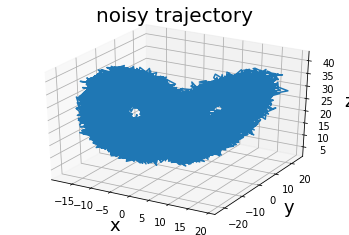

In [9]:
##### add noise and denoise for Lorenz
eps = 1  #float; magnitude of noise
sol_noise_y = np.ndarray(shape=(sol.y.shape))
for i in range(0,sol.y.shape[0]):
    SIZE = np.size(sol.y[i])
    sol_noise_y[i] = sol.y[i] + eps*np.random.normal(0,1,(SIZE))
    
    
fig = plt.figure()
ax = plt.axes(projection = '3d')
xdata = sol_noise_y[0]
ydata = sol_noise_y[1]
zdata = sol_noise_y[2]
# ax.scatter3D(xdata,ydata,zdata, c=zdata)
ax.plot3D(xdata,ydata,zdata)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.set_zlabel('z',fontsize=18)
ax.set_title('noisy trajectory',fontsize=20)
plt.show()